## Introduction 

In today's market, many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. For this, you need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.

* Market: The target audience is customers who use a company's free product. In this case study, this refers to users who installed (and used) the company's free mobile app.

* Product: The paid memberships often provide enhanced versions of the free products already given for free, alongside new features.

* Goal: The objective of this model is to predict which users will and will not subscribe to the premium membership so that we can focus our marketing efforts to convert these users to paid users. The marketing strategy can be bothways, We can either focus our limited resources on those who are more willing to take a subscription thereby increasing our profit with less effort or we could focus on converting those who are less willing to take a subscription. 

## Model Building

The Model Building Process is composed of the following sections:

* Plotting with Matplotlib and Seaborn - Exploratory Data Analysis (EDA)
* Data Preprocessing - We will use Pandas and Numpy for all of our data preprocessing.
* Classification Models from Sklearn Library (Logistic Regression, Tree, SVM, ...)
* K-Fold Cross Validation, Grid Search (Parameter Tuning), and Feature Selection algorithms.

## The Problem Statement

In this Case Study, we will be working for a fin-tech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers, the company releases a free version of its app with some of the main features unlocked.

The company has tasked you to identify which users will most likely NOT enroll in the paid product so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.



This app is used for financial purposes like bank loans, savings, etc. in one place. It has two versions free and premium. The free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.

The main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it. That’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior.

The job of the ML engineer is to find or predict new customer who is interested to buy the product or not. If the customers will buy a product anyway so no need to give an offer to that customer and loss the business. Only give offers to those customers who are interested to use premium version app but they can’t afford its cost. So the company will give offers to those customers and earn more money.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

### Reading the data

In [2]:
data = pd.read_csv("data.csv")
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


## Data Description

By working for the company, we have access to each customer's app behavior data. This data allows us to see the date and time of app installation, as well as the features the user engaged with within the app. App behavior is characterized as the list of app screens the user looked at, and whether the user played the financial mini-games available.
The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trail is over.

#### Feature	Description

* user - The client ID number
* first_open - The date and time, the user first open the app
* dayofweek - The day in numerical form (0: Sunday,..., 6: Saturday)
* hour - The hour of first open in 24h format
* age -	The age of the user
* screen_lists - Describes every single screen name the user has set in this 24-hours
* numscreens - The number of screens apairs in screen_lists
* minigame - The app has a mini-game, if the user played in the 24h it is set to 1, otherwise, it is set to 0
* liked - If the user liked any feature of the app it is set to 1, otherwise, it is set to 0
* used_premium_features - The user usage of the free trial of premium features is set to 1, otherwise, it is set to 0
* enrolled - This is the target column. If the user has enrolled in the premium offer it is set to 1, otherwise, it is set to 0
* enrolled_date - The date of enrollement if they did

In [3]:
data.shape

(50000, 12)

* As you can see the dataset size we have is good. More the data, more insights we can leverage.

### Summary Statistics

In [4]:
pd.set_option('display.float', "{:.2f}".format)
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,186889.73,3.03,31.72,21.10,0.11,0.17,0.62,0.17
std,107768.52,2.03,10.80,15.73,0.31,0.38,0.49,0.37
min,13.00,0.00,16.00,1.00,0.00,0.00,0.00,0.00
25%,93526.75,1.00,24.00,10.00,0.00,0.00,0.00,0.00
50%,187193.50,3.00,29.00,18.00,0.00,0.00,1.00,0.00
75%,279984.25,5.00,37.00,28.00,0.00,0.00,1.00,0.00
max,373662.00,6.00,101.00,325.00,1.00,1.00,1.00,1.00


* Some user data can be considered as a representation of a small sections of the users. These users are rare. 

In [6]:
## Data of age > 90

data[data.age > 90]

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
19194,149023,2012-11-24 15:00:00.363,5,15:00:00,101,"Credit3Dashboard,Loan2,Home,Credit3Container,C...",34,0,0,1,2012-11-24 15:00:00.411,0
20464,152043,2012-11-23 02:40:18.743,4,02:00:00,100,"joinscreen,Home,YourNetwork,FindFriendsCycle,L...",12,0,0,0,NaN,0
45047,63775,2013-06-07 17:17:13.153,4,17:00:00,100,"Home,Loan1,WebView,Loan3,History,Credit3,Settings",16,0,0,0,NaN,0
48327,308896,2012-11-23 03:48:14.997,4,03:00:00,98,"joinscreen,Credit3Container,ScanPreview,locati...",12,0,0,1,2013-03-08 17:02:30.944,0


In [7]:
## Data of numscreens > 200

data[data.numscreens > 200]

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
10834,207023,2012-11-24 15:00:00.346,5,15:00:00,26,"History,Loan1,CC1Category,ProfilePage,ProfileE...",216,0,1,1,2012-11-24 15:00:00.478,0
12723,4147,2012-11-27 15:00:00.358,1,15:00:00,23,"VerifyMobile,ProfilePage,CameraScreen,Settings...",234,0,0,1,2012-11-27 15:00:00.465,0
22975,77695,2012-11-24 15:00:00.355,5,15:00:00,24,"product_review,ProfilePage,AccountView,Institu...",243,0,1,1,2012-12-28 23:18:10.901,0
27660,73887,2012-11-30 15:00:00.359,4,15:00:00,20,"Credit3Dashboard,Credit3Container,Home,Communi...",325,0,0,1,2012-11-30 15:00:01.146,1
46169,196437,2012-12-01 15:00:00.364,5,15:00:00,42,"Saving8,Home,Saving2Amount,ProfilePage,EditPro...",247,0,0,0,NaN,0


In [8]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [9]:
data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

* Features don't have missing values except 'enrolled_date' because not all user have enrolled for the premium version. So we have 18926 users who have not enrolled.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [11]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

* As 'first_open', 'hour', and 'enrolled_date' are datetime objects but in our dataset they are of object type there is a need to convert them.

In [12]:
## Removing some duplicate records

data.drop_duplicates(keep="first", inplace=True)
data.shape

(49985, 12)

In [13]:
## Converting to Datetime type

data["first_open"] = pd.to_datetime(data["first_open"], yearfirst=True)
data["enrolled_date"] = pd.to_datetime(data["enrolled_date"], yearfirst=True)
data["hour"] = data.hour.str.slice(1, 3).astype(int)

In [14]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

## Exploratory Data Analysis

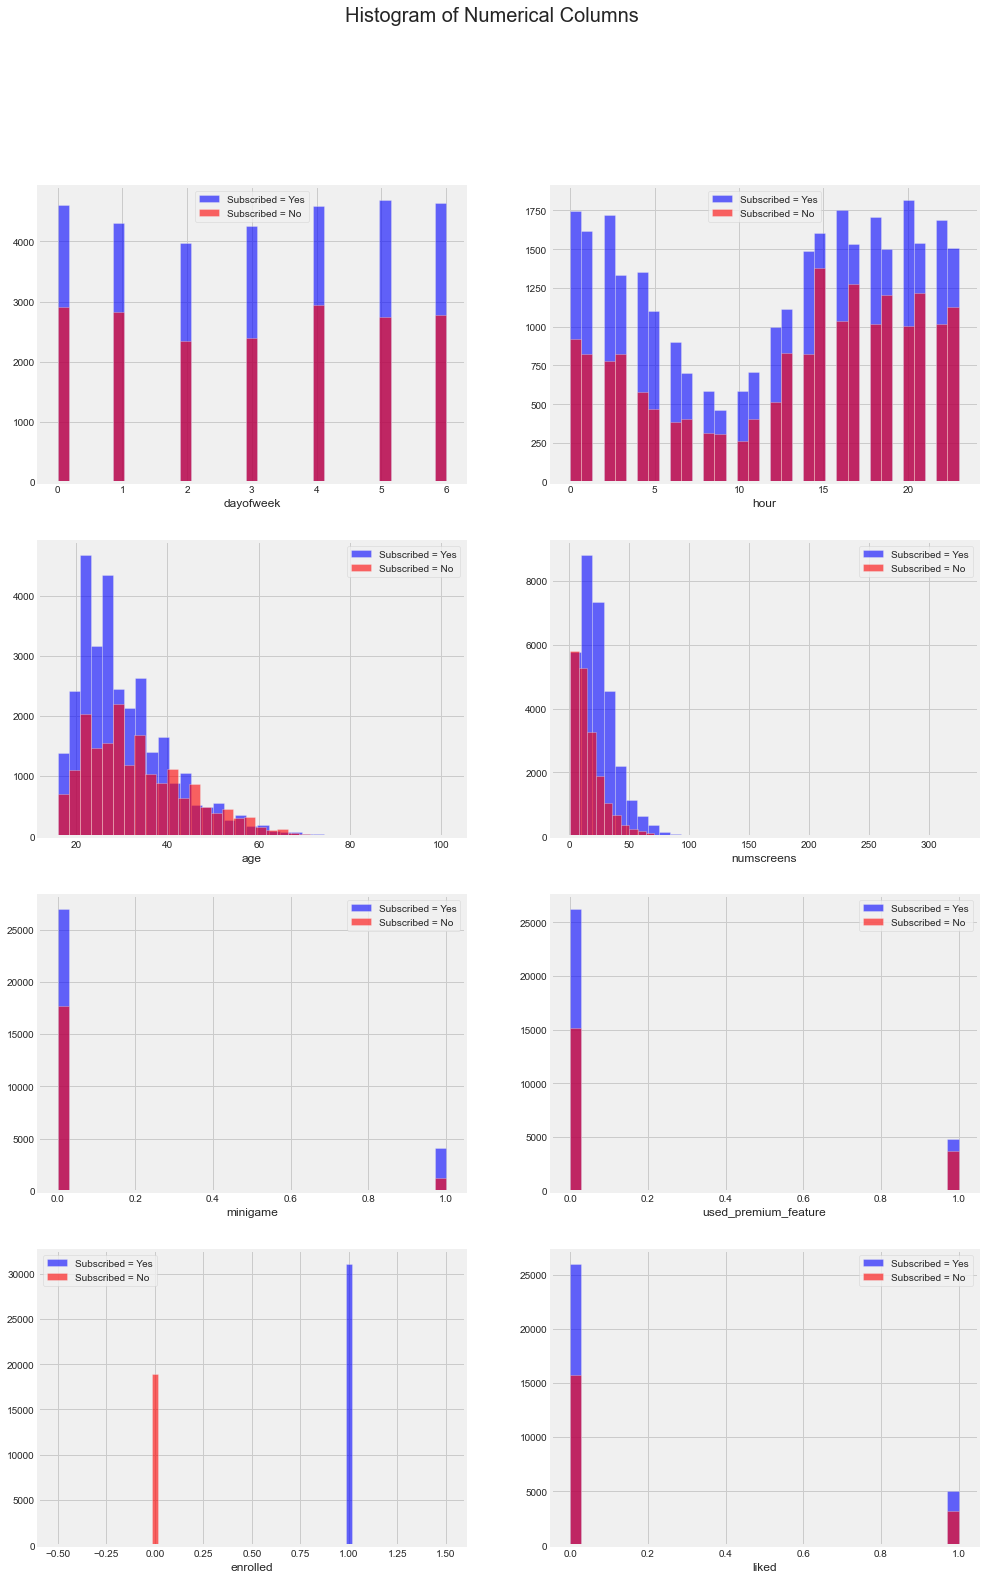

In [15]:
del_col = ['user', 'screen_list', 'enrolled_date', 'first_open']
columns = data.drop(del_col, axis=1).columns

plt.figure(figsize=(15, 25))
plt.suptitle("Histogram of Numerical Columns", fontsize=20)

for i, column in enumerate(columns, 1):
    plt.subplot(4, 2, i)
    data[data["enrolled"] == 1][column].hist(bins=35, color='blue', label='Subscribed = Yes', alpha=0.6)
    data[data["enrolled"] == 0][column].hist(bins=35, color='red', label='Subscribed = No', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

We can infer the following from the visualisation:

* The app is being used daily irrespective of the day, we will need to look into the type of users for each day.
* The app is used more either in the early morning or at night where the number of free user usage is greatest at night time. Further research is needed in this area.
* It is seen more users are in the 20 - 30 bracket and the number of free users are also in this bracket. Greater age is associated with premium users. Maybe the young users need only the basic features.
* Very few people are playing the minigame, but those who are playing it have also subscribed to the premium version, we may need to check on the type of mini game players also a check is needed on the quality of the game.
* It is seen that those who have already used the premium version have a lower chance of subscribing to it. This shows the need for a check on the necessity and quality of the premium version in the app.
* liked and used_premium_feature are showing a similar trend.

In [16]:
data.enrolled.value_counts()

1    31067
0    18918
Name: enrolled, dtype: int64

## Correlation

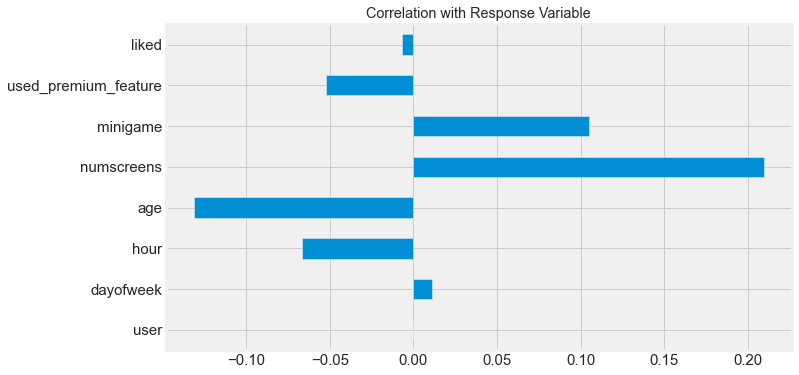

In [18]:
## Correlation with the target variable

data.drop('enrolled', axis=1).corrwith(data.enrolled).plot.barh(figsize=(10, 6), 
                                      title='Correlation with Response Variable',
                                      fontsize=15, rot=0, grid=True)
plt.show()

* 'hour', 'age', 'used_premium_feature', and 'liked' are negatively correlated with enrolled, that's means that the more those parameter increase, the less likely that the user register for premium offer.

* 'numscreens' and 'minigame' are positively correlated with enrolled, that's means that the more those parameter increase, the more likely that the user register for premium offer.

* The most interesting remark from the graph is that 'used_premium_feature' is negatively correlated with enrolled. Users who used the premium feature are convinced that the product isn't worth the price.

In [19]:
pd.set_option('display.float_format', '{:.2}'.format)
data.corr()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
user,1.0,-0.0025,-0.012,-0.0034,4.8e-05,0.0065,0.0041,-0.00053,0.0074
dayofweek,-0.0025,1.0,0.013,-0.012,0.008,-0.0086,0.0016,0.011,-0.0057
hour,-0.012,0.013,1.0,0.019,-0.077,-0.0091,0.023,-0.067,-0.0017
age,-0.0034,-0.012,0.019,1.0,-0.13,0.02,0.0042,-0.13,-0.0026
numscreens,4.8e-05,0.008,-0.077,-0.13,1.0,0.041,0.062,0.21,-0.0074
minigame,0.0065,-0.0086,-0.0091,0.02,0.041,1.0,0.11,0.1,-0.012
used_premium_feature,0.0041,0.0016,0.023,0.0042,0.062,0.11,1.0,-0.053,0.0017
enrolled,-0.00053,0.011,-0.067,-0.13,0.21,0.1,-0.053,1.0,-0.0071
liked,0.0074,-0.0057,-0.0017,-0.0026,-0.0074,-0.012,0.0017,-0.0071,1.0


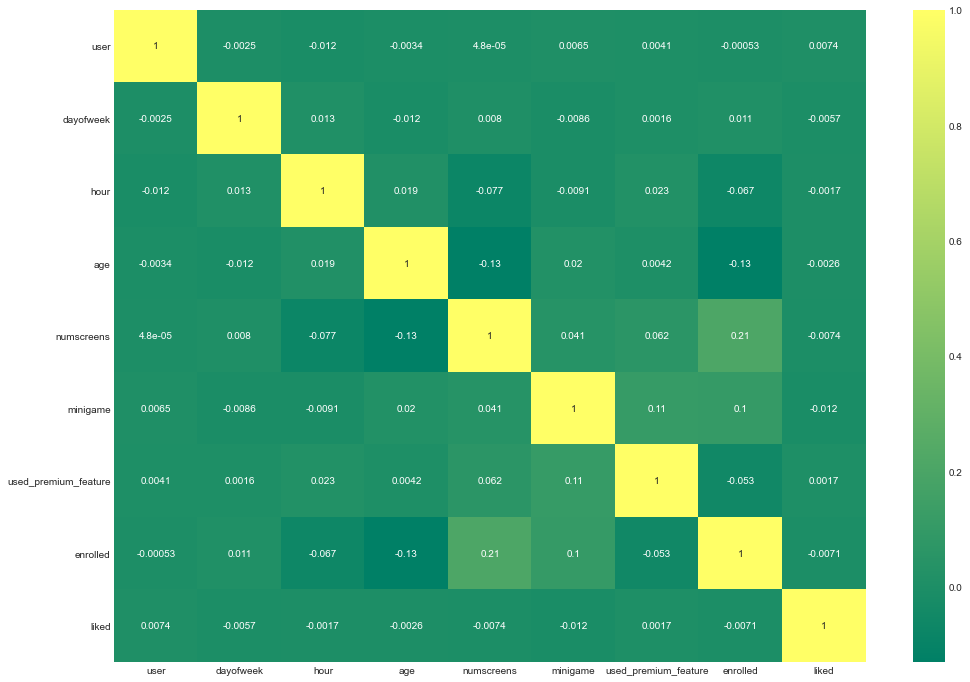

In [21]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, cmap='summer')
plt.show()

We need to understand the time a user takes to register for the premium offer. To do so, we need to know the average time for a user to register.

We need to measure the difference between 'first_open' and 'enrolled_date', and save it in a new column.

In [22]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [23]:
## Here the difference is calculated in terms of hours.

data['difference'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]')
data.sample(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
30553,243348,2013-03-08 03:10:03.918,4,3,26,"idscreen,joinscreen,Cycle,product_review,produ...",14,0,0,1,2013-03-08 03:11:19.171,0,0.0
22783,292311,2013-01-30 21:14:41.791,2,21,26,"Cycle,product_review,product_review2,VerifyDat...",19,0,0,1,2013-01-30 21:16:40.064,0,0.0
41625,117982,2012-12-24 05:49:42.175,0,5,19,"YourNetwork,VerifyToken,Home,product_review,pr...",13,0,0,1,2012-12-24 20:29:34.821,0,1.4e+01
44334,56030,2013-02-21 08:25:18.716,3,8,41,"joinscreen,product_review,product_review2,Scan...",12,0,0,1,2013-02-21 08:30:20.160,0,0.0
35700,235967,2013-01-28 17:11:11.948,0,17,18,"idscreen,Cycle,product_review,product_review2,...",15,0,1,1,2013-01-28 21:50:15.399,0,4.0
41258,104814,2013-06-27 19:48:03.469,3,19,37,"Home,ScanPreview,Credit3",3,1,0,0,NaT,0,nan
19257,319031,2013-06-18 18:36:58.883,1,18,29,"idscreen,Cycle,Home,product_review,product_rev...",31,0,0,1,2013-06-18 18:41:07.822,0,0.0
25079,4433,2013-02-16 19:46:35.893,5,19,34,"Home,ProfilePage,Saving9,Saving1,Saving10,Savi...",27,0,0,0,NaT,0,nan
45494,154100,2013-06-08 04:59:02.707,5,4,25,"idscreen,product_review,Home,Leaderboard,Loan3...",10,0,0,0,NaT,0,nan
26004,8044,2013-03-18 15:41:02.716,0,15,18,"joinscreen,Cycle,product_review,product_review...",33,0,1,1,2013-03-18 15:42:20.044,0,0.0


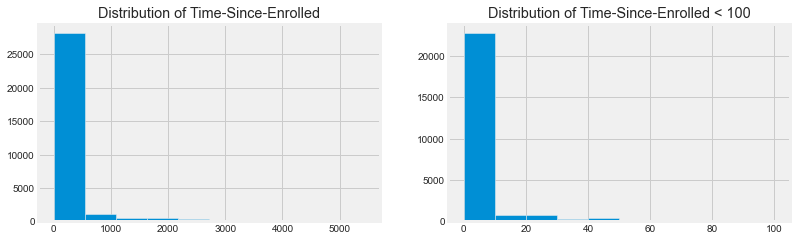

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(data['difference'].dropna())
plt.title('Distribution of Time-Since-Enrolled');

plt.subplot(2, 2, 2)
plt.hist(data['difference'].dropna(), range=[0, 100])
plt.title('Distribution of Time-Since-Enrolled < 100');

* We notice that most of the users enroll within the first 20 to 30 hours. We can infer that 50 hours is a good cut-off time  to test the response of the users. So every user that enrolled after 50 hours can be considered as Non-enrolled for checking the accurate response of the users.

In [26]:
data.loc[data.difference > 50, 'enrolled'] = 0

* Now, we no-longer need 'difference', 'enrolled_date', and 'first_open' so we will drop them.

In [27]:
data.drop(columns=['difference', 'enrolled_date', 'first_open'], axis=1, inplace=True)

* Now, we are going to analyze the screen_list feature. We can find the most important features (The feature that is more commonly used by the users) by counting them.

In [28]:
## Using Counter to get the screen names

from collections import Counter

list_of_screens = Counter()

for screens in data.screen_list.str.split(','):
    list_of_screens.update(screens)

print(f'We have {len(list_of_screens)} number of screens.')  

top_screens = [screen[0] for screen in list_of_screens.most_common(50)]

print(sorted(top_screens))

We have 137 number of screens.
['Alerts', 'BankVerification', 'CC1', 'CC1Category', 'CommunityAndInvites', 'Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard', 'Cycle', 'EditProfile', 'Finances', 'Home', 'Institutions', 'Leaderboard', 'Loan1', 'Loan2', 'Loan3', 'MLWebView', 'ProfileChildren', 'ProfileEducation', 'ProfileEducationMajor', 'ProfileMaritalStatus', 'ProfilePage', 'ReferralContainer', 'RewardsContainer', 'Saving1', 'Saving10', 'Saving4', 'Saving8', 'Saving9', 'ScanPreview', 'SelectInstitution', 'Settings', 'Splash', 'VerifyCountry', 'VerifyDateOfBirth', 'VerifyHousing', 'VerifyHousingAmount', 'VerifyMobile', 'VerifyPhone', 'VerifySSN', 'VerifyToken', 'idscreen', 'joinscreen', 'location', 'product_review', 'product_review2', 'product_review3']


In [29]:
## Most common screens along with their frequency

list_of_screens.most_common(50)

[('product_review', 94201),
 ('Home', 38089),
 ('ScanPreview', 28347),
 ('VerifyPhone', 26227),
 ('location', 25881),
 ('Loan2', 25312),
 ('VerifyDateOfBirth', 23668),
 ('VerifySSN', 21542),
 ('VerifyCountry', 21155),
 ('VerifyToken', 20330),
 ('product_review3', 19608),
 ('SelectInstitution', 19592),
 ('Cycle', 17771),
 ('product_review2', 17125),
 ('idscreen', 17028),
 ('Credit3Container', 16485),
 ('BankVerification', 15898),
 ('Institutions', 14645),
 ('joinscreen', 13314),
 ('Splash', 10035),
 ('Credit1', 9738),
 ('Credit3Dashboard', 9527),
 ('ReferralContainer', 8442),
 ('ProfilePage', 7900),
 ('Loan3', 7157),
 ('Credit2', 5399),
 ('Credit3', 4885),
 ('Loan1', 4599),
 ('CC1', 4369),
 ('RewardsContainer', 4195),
 ('CommunityAndInvites', 4027),
 ('MLWebView', 3827),
 ('Finances', 3816),
 ('Settings', 3490),
 ('Alerts', 3456),
 ('Saving9', 3004),
 ('CC1Category', 2996),
 ('Saving8', 2784),
 ('VerifyMobile', 2692),
 ('Saving1', 2626),
 ('Leaderboard', 2576),
 ('Saving10', 2455),
 ('E

* Now we need to create a column for each of those top screens.

In [30]:
data["screen_list"] = data.screen_list.astype(str) + ','

for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc + ',', '')

In [31]:
data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Leaderboard,Saving10,EditProfile,ProfileMaritalStatus,ProfileChildren,Saving4,VerifyHousing,ProfileEducation,VerifyHousingAmount,ProfileEducationMajor
0,235136,3,2,23,"ProfileForgotPassword,Login,",15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,333588,6,1,24,,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,"Loan,",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"Rewards,RewardDetail,",40,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,,32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


* To get value of the left over screens, we'll create a new column 'other' that saves the number of left screens.

In [32]:
data['Other'] = data.screen_list.str.count(',')

In [33]:
data.drop('screen_list', axis=1, inplace=True)

In [34]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,product_review,...,Saving10,EditProfile,ProfileMaritalStatus,ProfileChildren,Saving4,VerifyHousing,ProfileEducation,VerifyHousingAmount,ProfileEducationMajor,Other
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


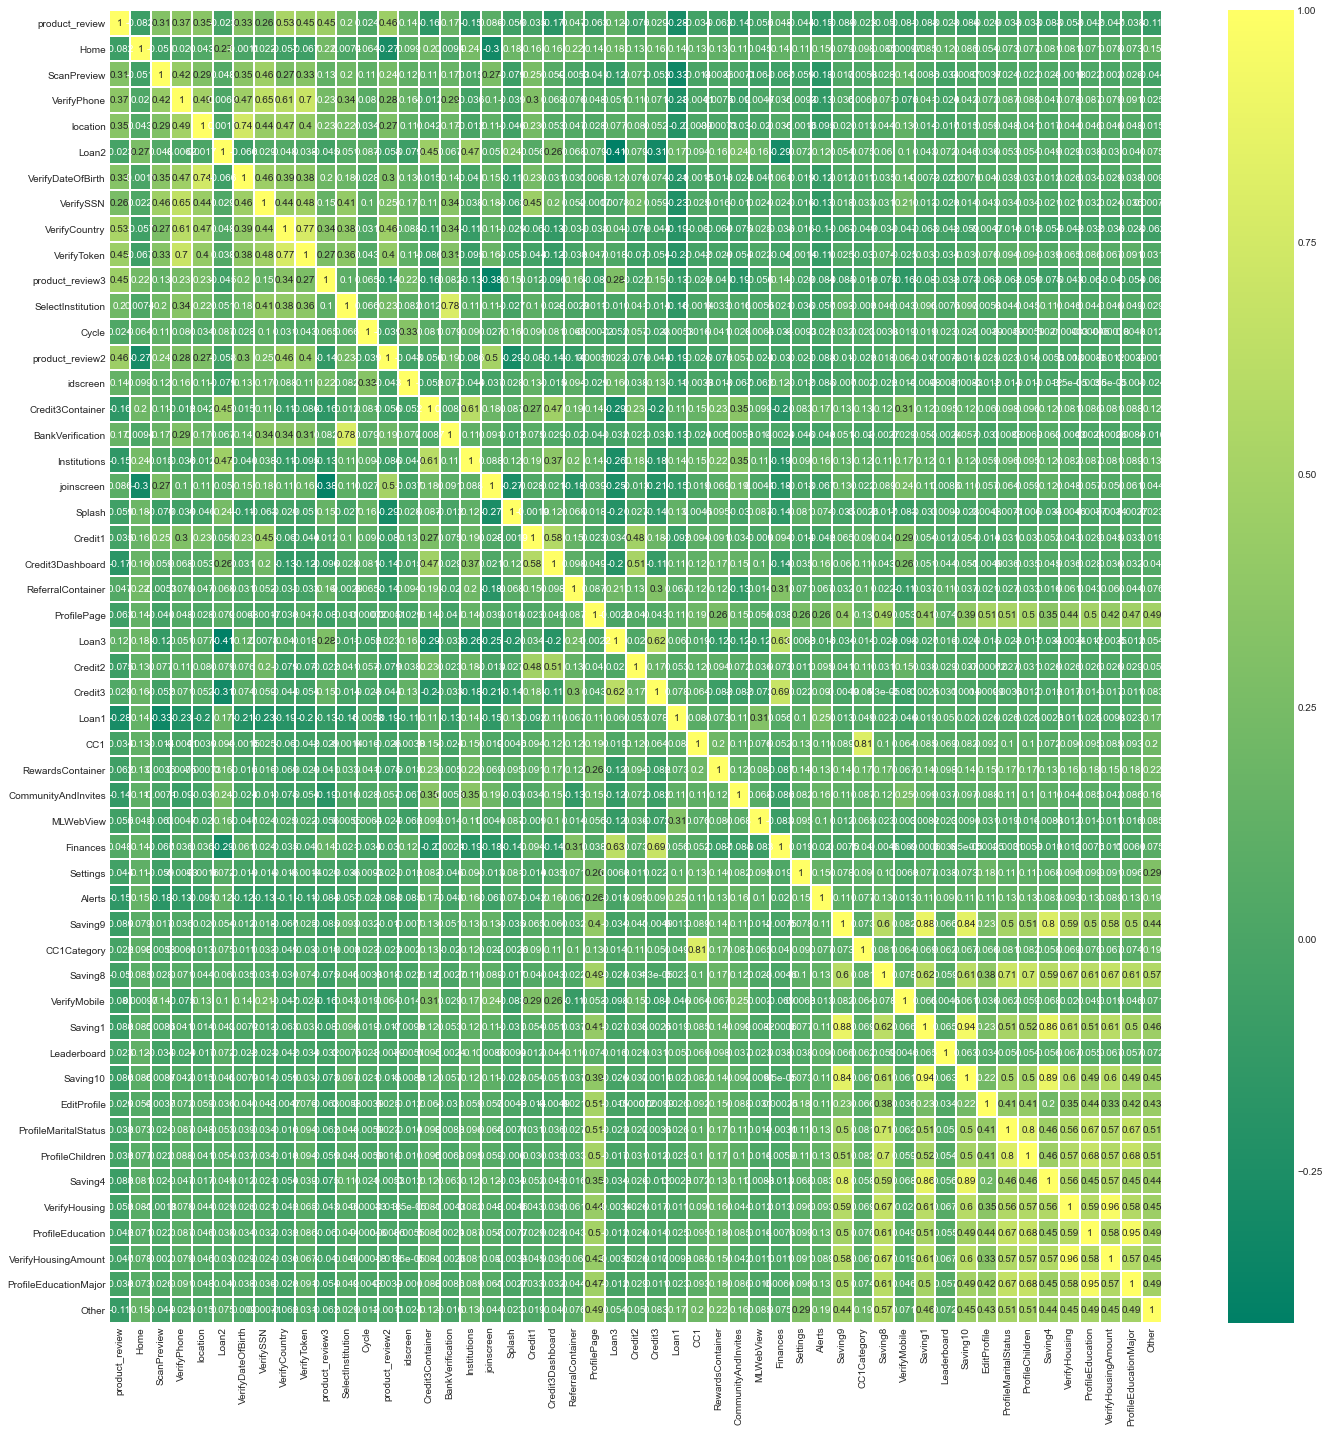

In [35]:
## Now we will find the highly correlated columns and then delete them

plt.figure(figsize=(20, 20))
sns.heatmap(data.iloc[:,9:].corr(),annot=True, linewidth = 1, cmap='summer', annot_kws={'size':10})
plt.tight_layout()
plt.show()

* The saving columns are highly correlated, so we need to delete them. But before so we need to create a SavingsCount feature. The same for Credit, CreditCards, and Loan.

In [36]:
savings_screens = ["Saving1", "Saving4", "Saving8", "Saving9", "Saving10"]

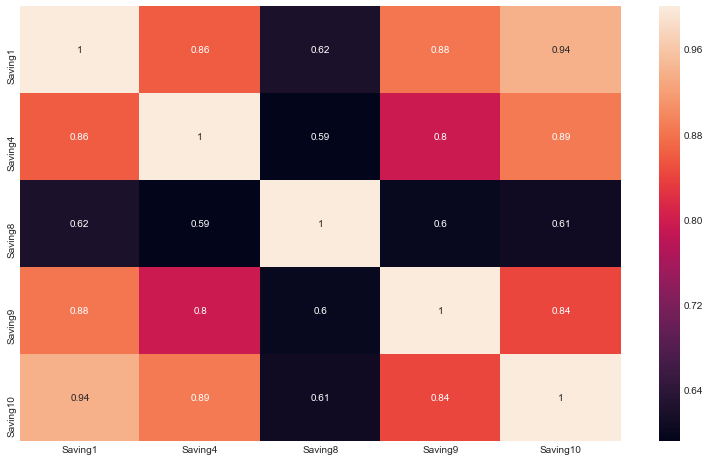

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[savings_screens].corr(), annot=True)
plt.show()

In [39]:
data[savings_screens].sum()

Saving1     2769
Saving4     2224
Saving8     2784
Saving9     3004
Saving10    2455
dtype: int64

In [40]:
data['SavingsCount'] = data[savings_screens].sum(axis=1)
data.drop(savings_screens, axis=1, inplace=True)

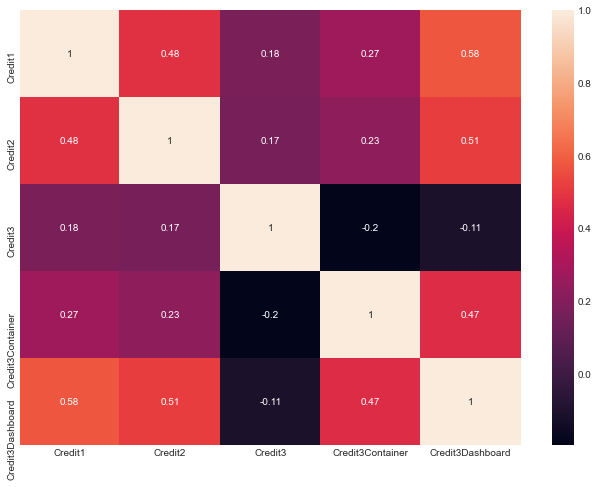

In [41]:
cm_screens = ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard"]
data["CMCount"] = data[cm_screens].sum(axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(data[cm_screens].corr(), annot=True)

plt.show()

In [42]:
data.drop(cm_screens, axis=1, inplace=True)

In [43]:
data['CMCount']

0        0
1        0
2        0
3        3
4        2
        ..
49995    2
49996    0
49997    0
49998    0
49999    0
Name: CMCount, Length: 49985, dtype: int64

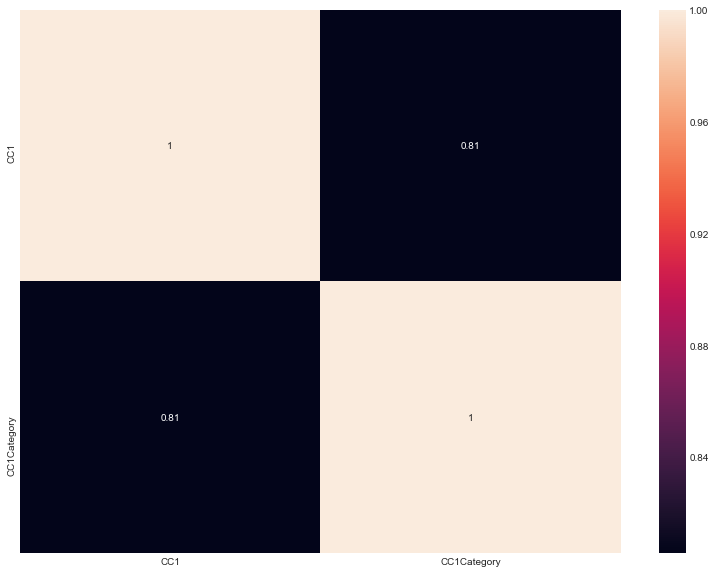

In [45]:
cc_screens = ["CC1", "CC1Category"]
data['CCCount'] = data[cc_screens].sum(axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(data[cc_screens].corr(), annot=True)
plt.show()

In [46]:
data.drop(cc_screens, axis=1, inplace=True)

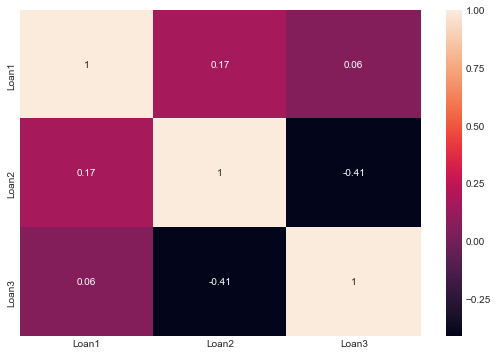

In [47]:
loan_screens = ["Loan1", "Loan2", "Loan3"]
data["LoansCount"] = data[loan_screens].sum(axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(data[loan_screens].corr(), annot=True)
plt.show()

In [48]:
data.drop(loan_screens, axis=1, inplace=True)

In [49]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,product_review,...,ProfileChildren,VerifyHousing,ProfileEducation,VerifyHousingAmount,ProfileEducationMajor,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,2,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,2,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,2,0,1


In [50]:
pd.set_option('display.float', "{:.2f}".format)
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,product_review,...,ProfileChildren,VerifyHousing,ProfileEducation,VerifyHousingAmount,ProfileEducationMajor,Other,SavingsCount,CMCount,CCCount,LoansCount
count,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,...,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00
mean,186903.05,3.03,12.56,31.72,21.10,0.11,0.17,0.50,0.17,0.71,...,0.05,0.05,0.05,0.04,0.04,0.67,0.26,0.93,0.15,0.74
std,107771.06,2.03,7.44,10.80,15.73,0.31,0.38,0.50,0.37,0.45,...,0.21,0.21,0.21,0.20,0.20,1.42,1.01,1.22,0.50,0.61
min,13.00,0.00,0.00,16.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,93528.00,1.00,5.00,24.00,10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,187210.00,3.00,14.00,29.00,18.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,280000.00,5.00,19.00,37.00,28.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
max,373662.00,6.00,23.00,101.00,325.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,20.00,5.00,5.00,2.00,2.00
